In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from IPython.display import display

## Section 1: Data Wrangling & Exploratory Data Analysis

<b>Importing Dataset</b>

In [10]:
df = pd.read_csv("IoT_dataset.csv")
df.columns
df

,DATE_TIME,POWER
0,21-04-2021 23:30,0.0
1,21-04-2021 23:45,0.0
2,22-04-2021 00:00,0.0
3,22-04-2021 00:15,0.0
4,22-04-2021 00:30,0.0
...,...,...
659,28-04-2021 22:15,0.0
660,29-04-2021 06:15,0.0
661,29-04-2021 06:30,0.0
662,29-04-2021 06:45,0.0


In [11]:
df['DATE_TIME']= pd.to_datetime(df['DATE_TIME'],format='%d-%m-%Y %H:%M')

In [12]:
df.dtypes

DATE_TIME    datetime64[ns]
POWER               float64
dtype: object

## Setting Index 
For time series data manipulation, we'll set the the DATE_TIME column as the index using the Pandas DateTime Index.

In [13]:
df.set_index('DATE_TIME', inplace=True)

In [14]:
df.index

DatetimeIndex(['2021-04-21 23:30:00', '2021-04-21 23:45:00',
               '2021-04-22 00:00:00', '2021-04-22 00:15:00',
               '2021-04-22 00:30:00', '2021-04-22 00:45:00',
               '2021-04-22 01:00:00', '2021-04-22 01:15:00',
               '2021-04-22 01:30:00', '2021-04-22 01:45:00',
               ...
               '2021-04-28 21:00:00', '2021-04-28 21:15:00',
               '2021-04-28 21:30:00', '2021-04-28 21:45:00',
               '2021-04-28 22:00:00', '2021-04-28 22:15:00',
               '2021-04-29 06:15:00', '2021-04-29 06:30:00',
               '2021-04-29 06:45:00', '2021-04-29 07:00:00'],
              dtype='datetime64[ns]', name='DATE_TIME', length=664, freq=None)

The 'DatetimeIndex' is a different from the ordinary index and it offers more functionality for time series data wrangling.

The output indicates the days of the month we're working with and the week of the year.

<b> Grouping data on an hourly basis.<b>

In [15]:
df['POWER'] = df['POWER'].resample('H').mean()

In [16]:
# Dropping empty rows
df = df.dropna()

In [23]:
df.head(50)

,POWER
DATE_TIME,
2021-04-22 00:00:00,0.000000
2021-04-22 01:00:00,0.000000
2021-04-22 02:00:00,0.000000
2021-04-22 03:00:00,0.000000
2021-04-22 04:00:00,0.000000
2021-04-22 05:00:00,0.000000
2021-04-22 06:00:00,0.264878
2021-04-22 07:00:00,1.293330
2021-04-22 08:00:00,1.493807


### Plotting Time Series Data

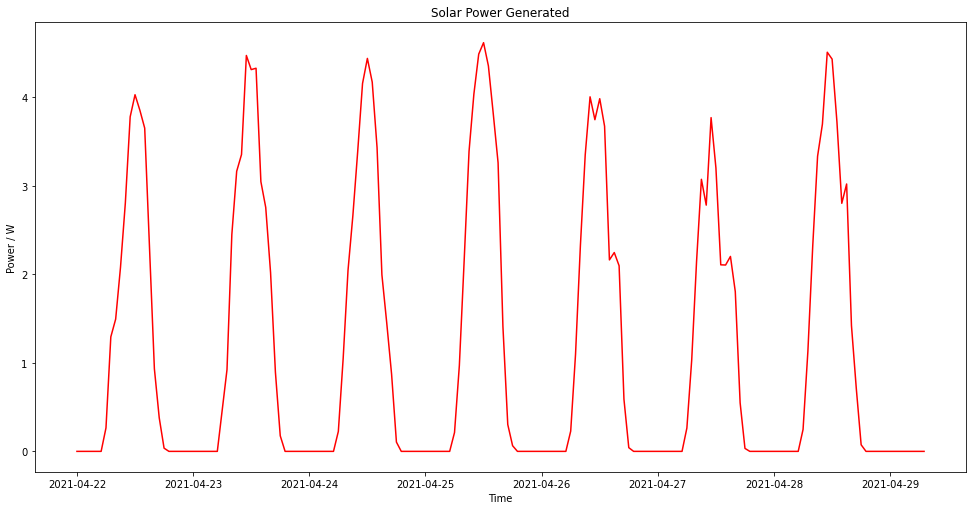

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(16.7, 8.27)
ax.set(xlabel='Time', ylabel='Power / W', title='Solar Power Generated')
sns.lineplot(data = df, x = 'DATE_TIME', y='POWER', color = 'red' );